In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)



In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

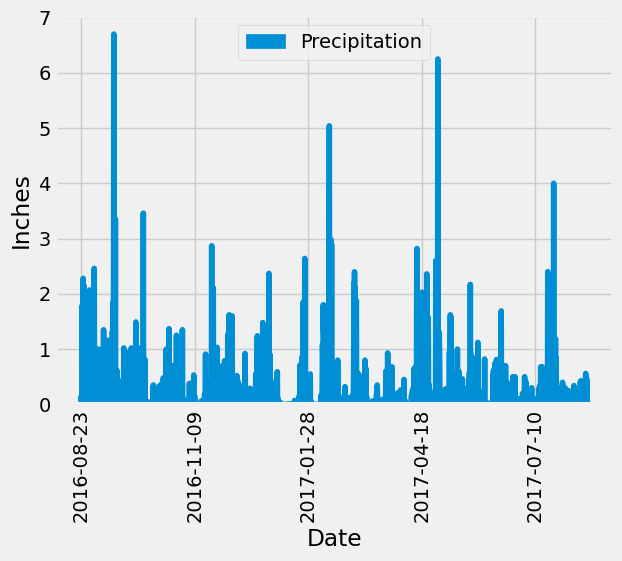

In [68]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
 
# Calculate the date one year from the last date in data set.

year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_ago

# Perform a query to retrieve the data and precipitation scores


y_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_ago).\
    order_by(Measurement.date)
  

# Save the query results as a Pandas DataFrame. Explicitly set the column names

df = pd.DataFrame(y_prcp, columns=['Date', 'Precipitation'])
# print(df)

# Sort the dataframe by date

df.sort_values(by="Date")

# Use Pandas Plotting with Matplotlib to plot the data

df.set_index('Date', inplace=True)
df.plot.area()
plt.xticks(rotation=90)
plt.ylabel("Inches")
plt.show()

In [69]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [108]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [109]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
count = func.count(Measurement.station)
sel = [Measurement.station,
       count]
active_station = session.query(*sel).\
    group_by(Measurement.station).\
    order_by(count.desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [123]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel =  [func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]
active_station_calcs = session.query(*sel).\
    filter(Measurement.station == "USC00519281").all()
active_station_calcs

[(54.0, 85.0, 71.66378066378067)]

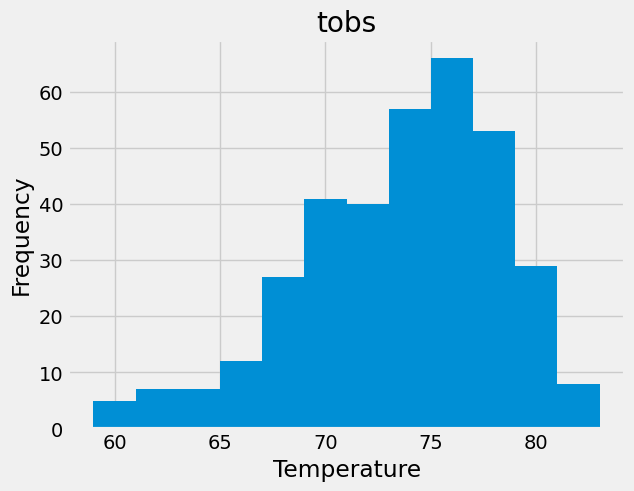

In [160]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
y_tobs = session.query(Measurement.station, Measurement.tobs).\
    filter(Measurement.date >= year_ago).\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.tobs)

#saving query to a dataframe
df2 = pd.DataFrame(y_tobs, columns=['station','tobs'])

#Create histogram with bins = 12
df2.hist(column = 'tobs', bins=12)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.show()


# Close Session

In [161]:
# Close Session
session.close()